<a href="https://colab.research.google.com/github/Suryans01/CODSOFTJUNE_INTERNSHIP/blob/main/Movie_Ratings_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Description**

 FILE DESCRIPTION

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

    UserIDs range between 1 and 6040
    MovieIDs range between 1 and 3952
    Ratings are made on a 5-star scale (whole-star ratings only)
    Timestamp is represented in seconds since the epoch as returned by time(2)
    Each user has at least 20 ratings

USERS FILE DESCRIPTION

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy. Only users who have provided some demographic
information are included in this data set.

    Gender is denoted by a "M" for male and "F" for female

    Age is chosen from the following ranges:
        1: "Under 18"
        18: "18-24"
        25: "25-34"
        35: "35-44"
        45: "45-49"
        50: "50-55"
        56: "56+"

    Occupation is chosen from the following choices:
        0: "other" or not specified
        1: "academic/educator"
        2: "artist"
        3: "clerical/admin"
        4: "college/grad student"
        5: "customer service"
        6: "doctor/health care"
        7: "executive/managerial"
        8: "farmer"
        9: "homemaker"
        10: "K-12 student"
        11: "lawyer"
        12: "programmer"
        13: "retired"
        14: "sales/marketing"
        15: "scientist"
        16: "self-employed"
        17: "technician/engineer"
        18: "tradesman/craftsman"
        19: "unemployed"
        20: "writer"

MOVIES FILE DESCRIPTION

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

    Titles are identical to titles provided by the IMDB (including
    year of release)

    Genres are pipe-separated and are selected from the following genres:
        Action
        Adventure
        Animation
        Children's
        Comedy
        Crime
        Documentary
        Drama
        Fantasy
        Film-Noir
        Horror
        Musical
        Mystery
        Romance
        Sci-Fi
        Thriller
        War
        Western

    Some MovieIDs do not correspond to a movie due to accidental duplicate
    entries and/or test entries

    Movies are mostly entered by hand, so errors and inconsistencies may exist


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [23]:
path=input("enter the path of /content/movie_metadata[1].csv")

enter the path of /content/movie_metadata[1].csvmovie_metadata[1].csv


In [24]:
df = pd.read_csv(path)

In [25]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [26]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [27]:
df.dropna(inplace=True)

## Histogram of Imdb rating

Text(0.5, 1.0, 'Distribution of Movie Ratings')

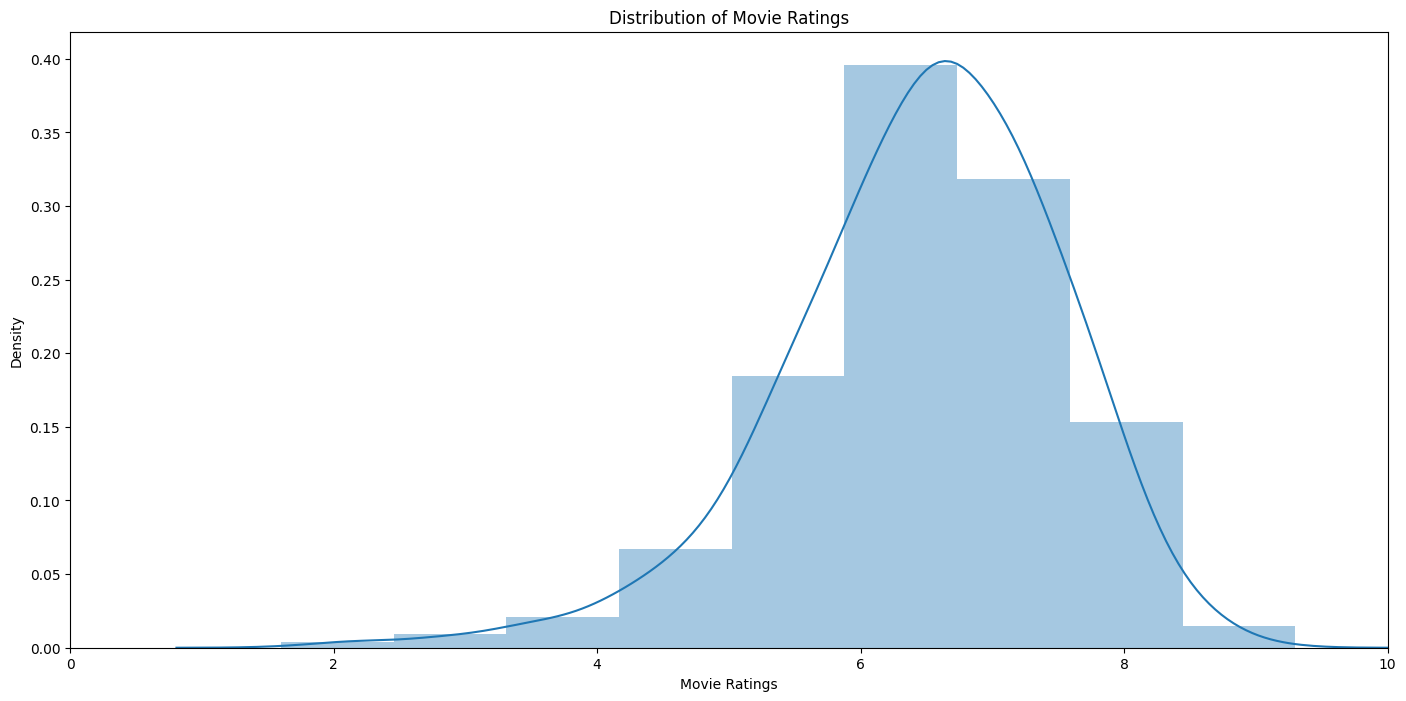

In [28]:
plt.figure(figsize=(17,8))
ax = sns.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25},
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings")

In [29]:
movie_ratings = df[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']]

In [30]:
movie_ratings = movie_ratings.dropna()

### Pair Plot

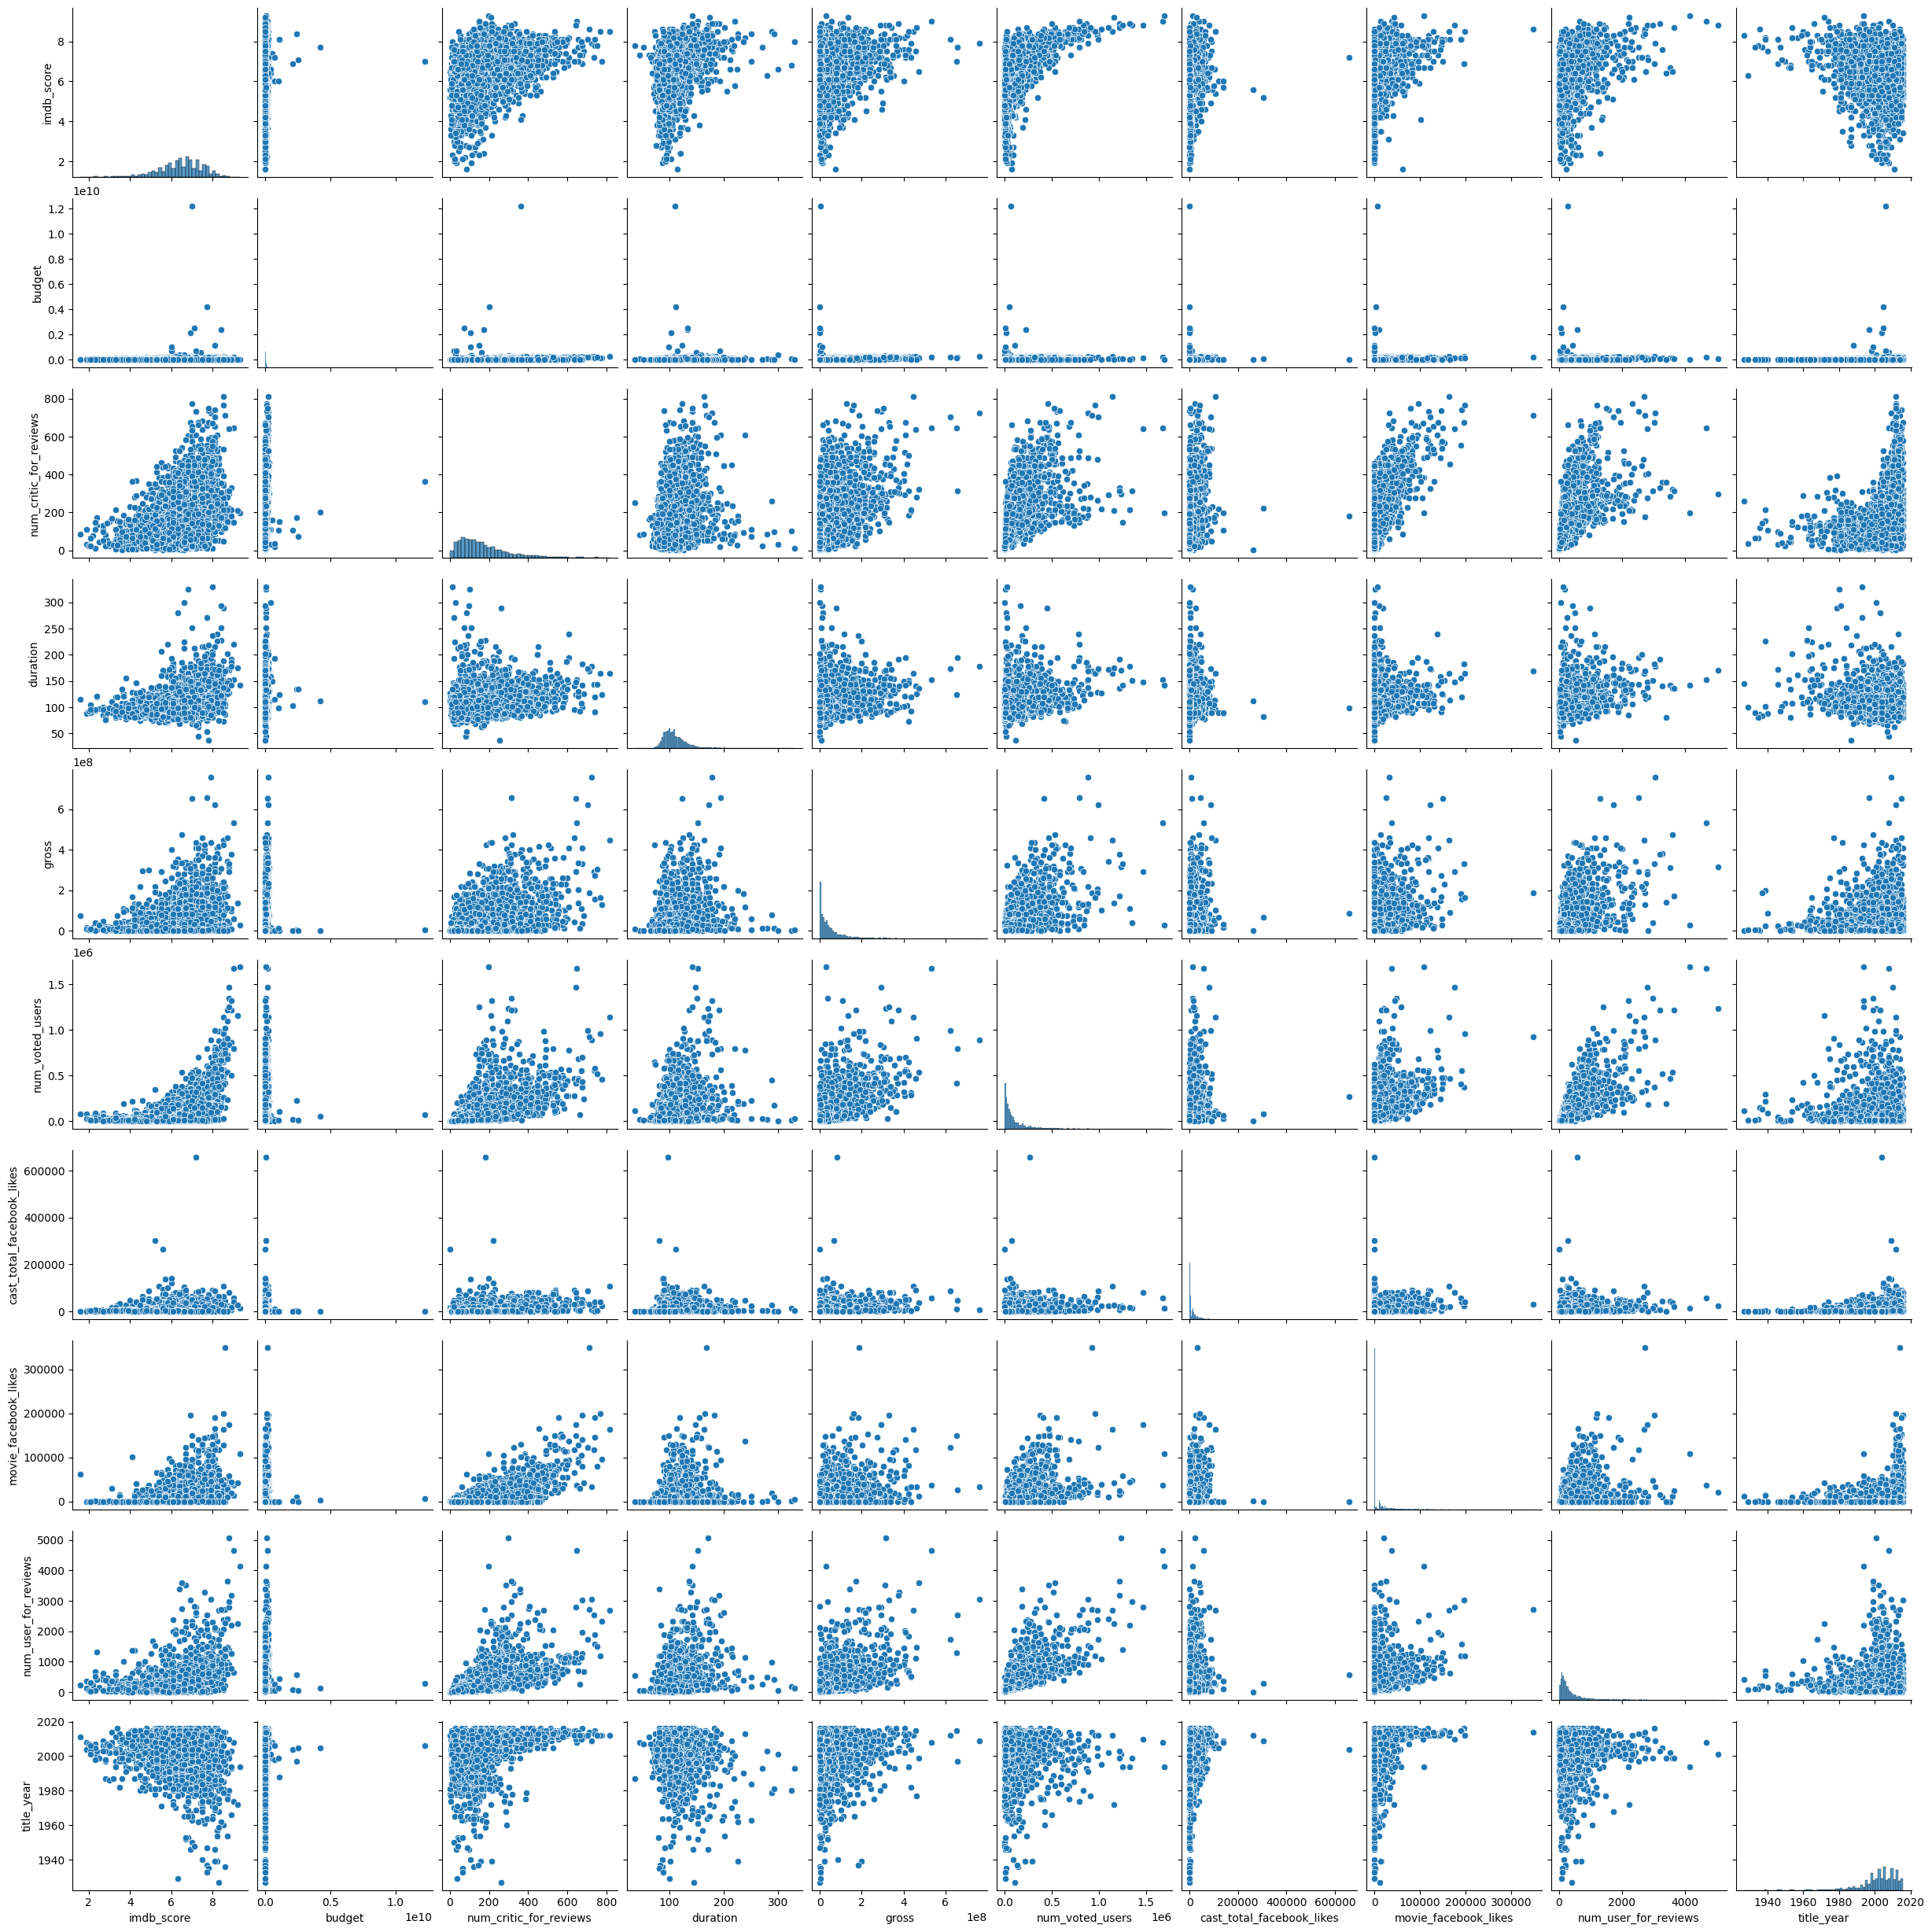

In [31]:
sns.pairplot(movie_ratings[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']])

## Joint Plot imdb rating vs budget

Text(0.5, 1.0, 'imdb rating vs budget')

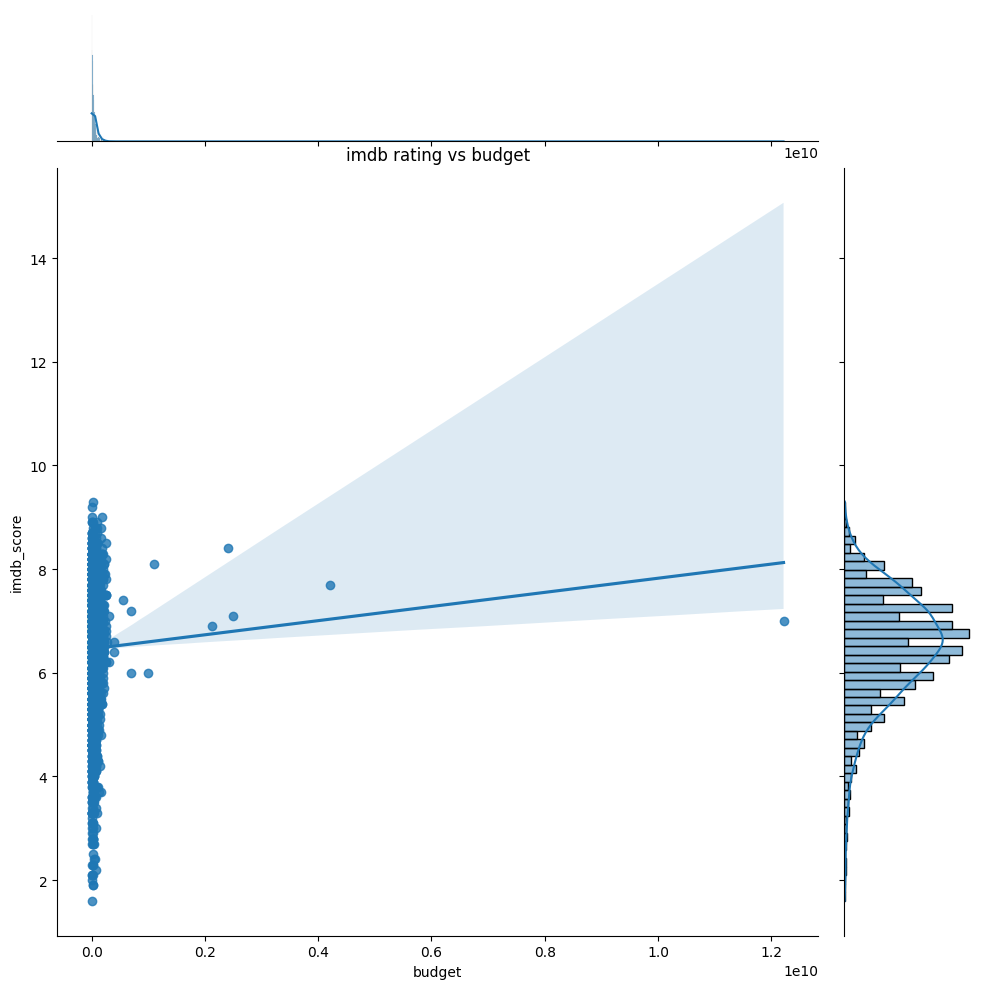

In [32]:
sns.jointplot(x='budget', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('budget')
plt.ylabel('imdb_score')
plt.title('imdb rating vs budget')

## Joint Plot imdb rating vs gross

Text(0.5, 1.0, 'imdb rating vs gross')

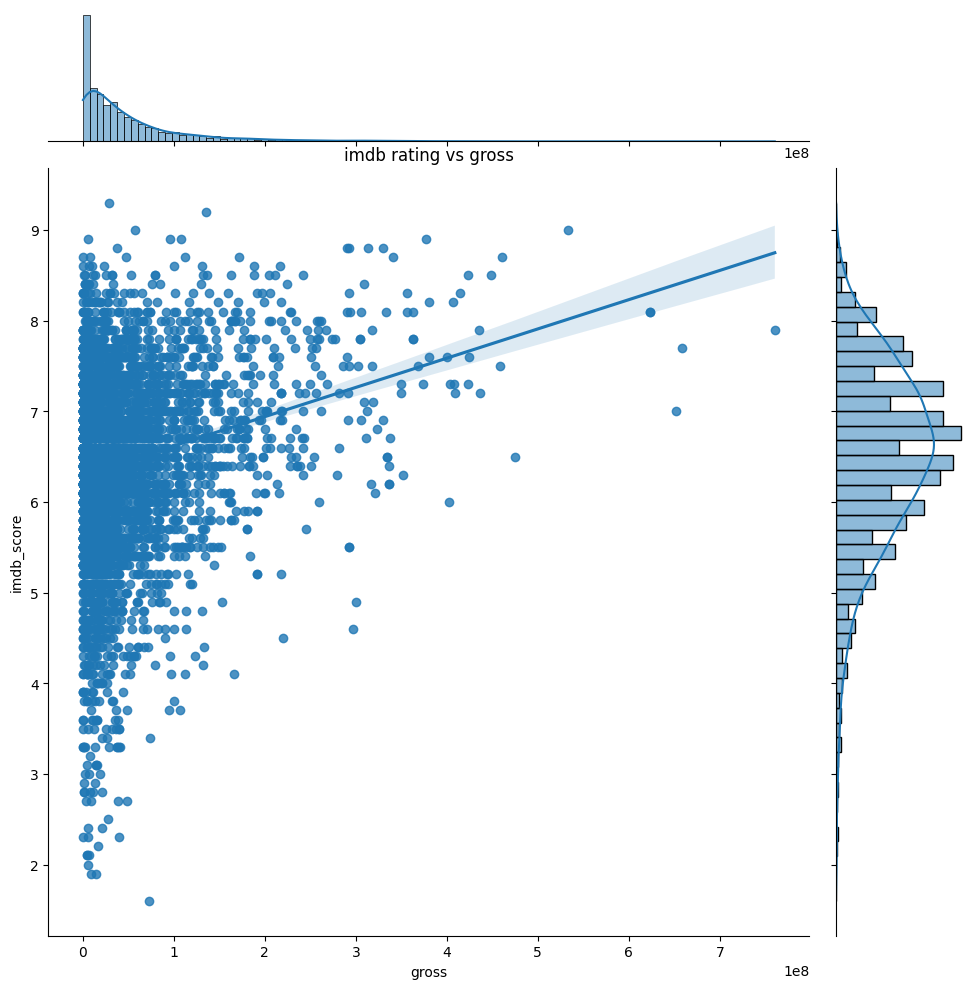

In [33]:
sns.jointplot(x='gross', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('gross')
plt.ylabel('imdb_score')
plt.title('imdb rating vs gross')

In [34]:
movie_ratings.columns

Index(['imdb_score', 'budget', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
       'num_user_for_reviews', 'title_year'],
      dtype='object')

## Joint Plot imdb rating vs num_critic_for_reviews

Text(0.5, 1.0, 'imdb rating vs num_critic_for_reviews')

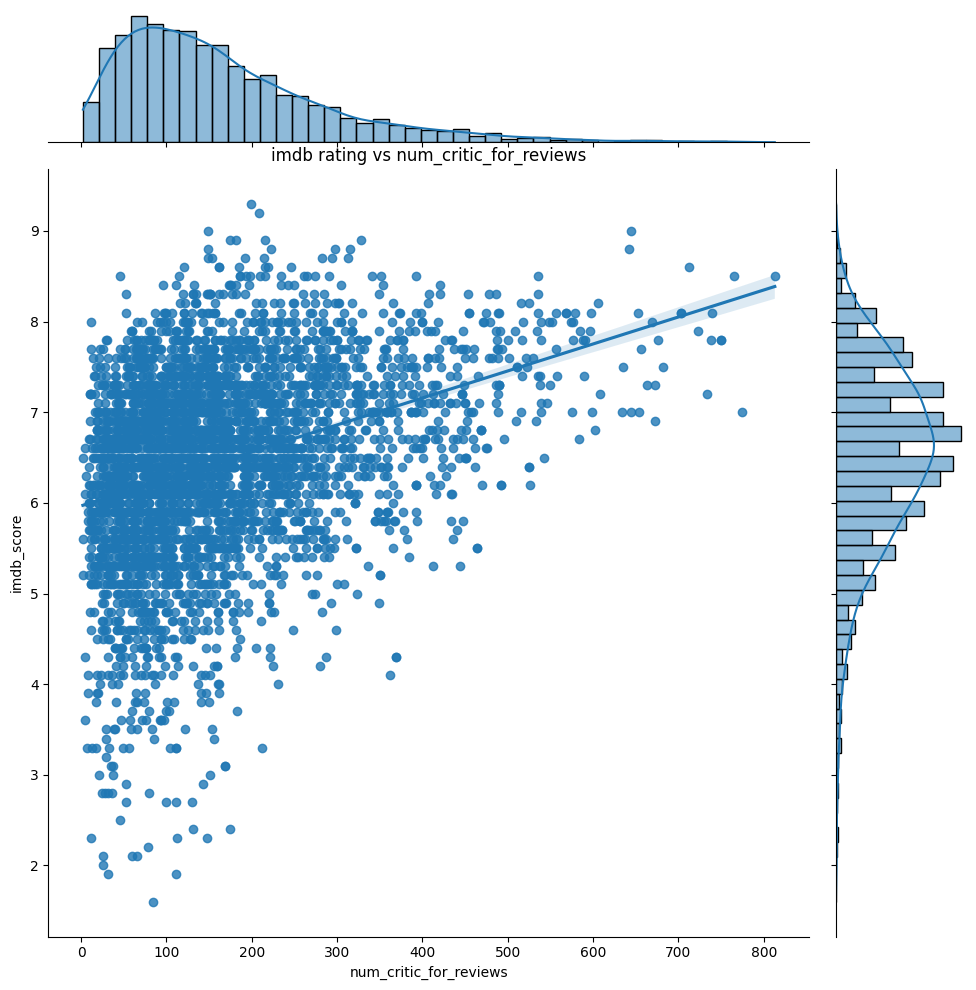

In [35]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_critic_for_reviews')

## Joint Plot imdb rating vs duration

Text(0.5, 1.0, 'imdb rating vs duration')

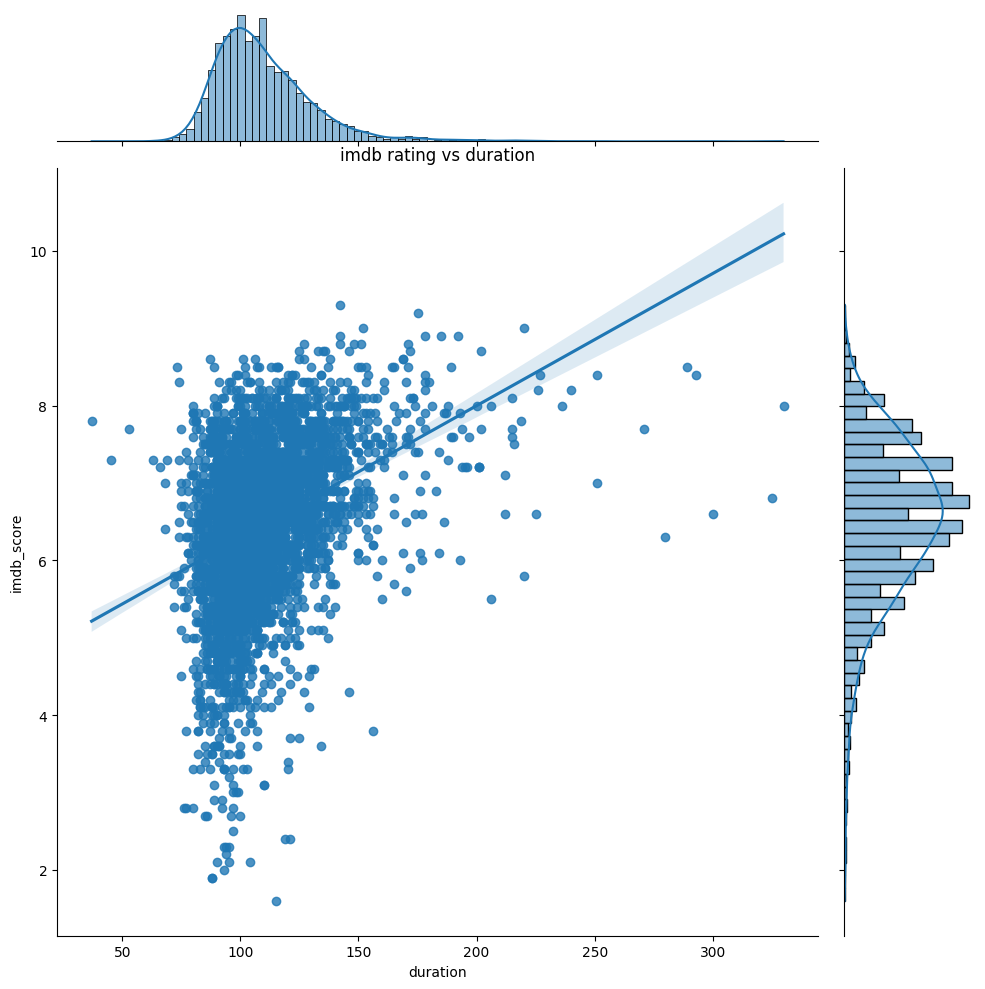

In [36]:
sns.jointplot(x='duration', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('imdb rating vs duration')

## Joint Plot imdb rating vs num_user_for_reviews

Text(0.5, 1.0, 'imdb rating vs num_user_for_reviews')

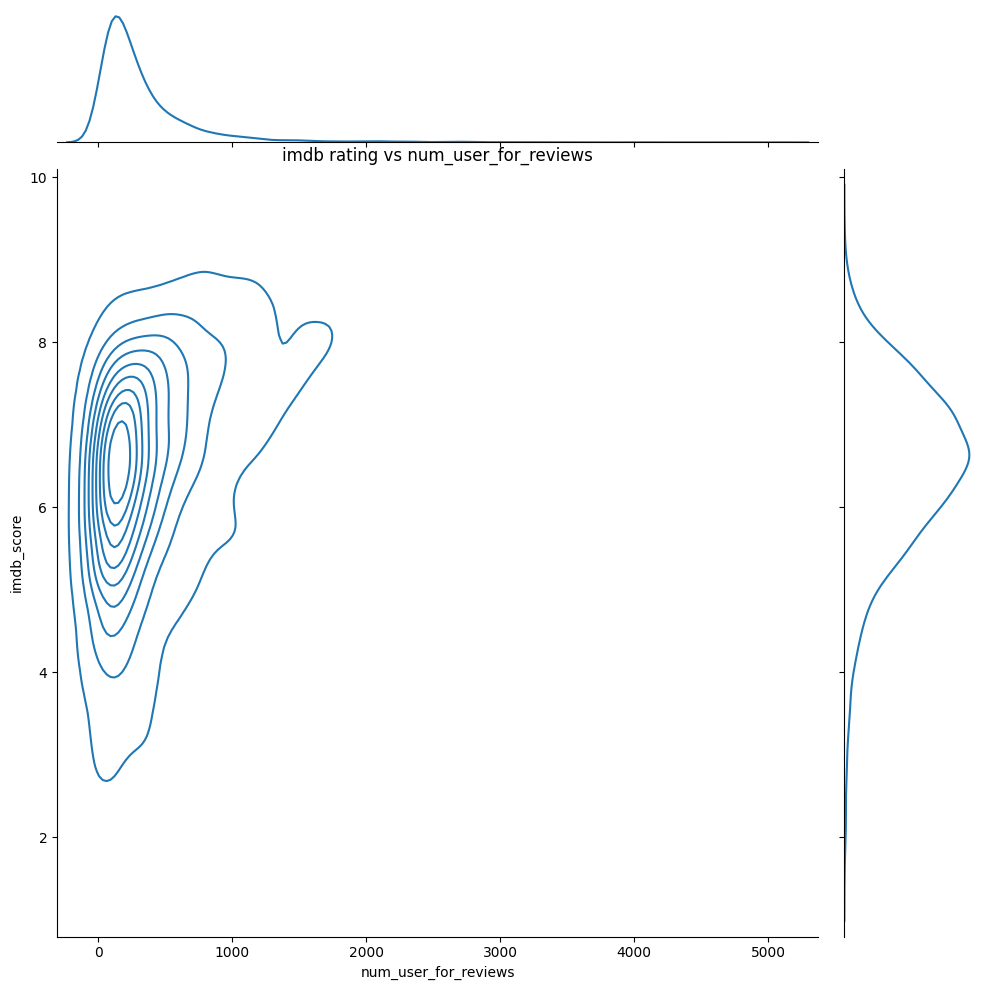

In [37]:
sns.jointplot(x='num_user_for_reviews', y='imdb_score', data=movie_ratings, kind='kde', height=10)
plt.xlabel('num_user_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_user_for_reviews')

In [38]:
movie_ratings.columns

Index(['imdb_score', 'budget', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
       'num_user_for_reviews', 'title_year'],
      dtype='object')

## Joint Plot imdb rating vs title year

Text(0.5, 1.0, 'imdb rating vs title_year')

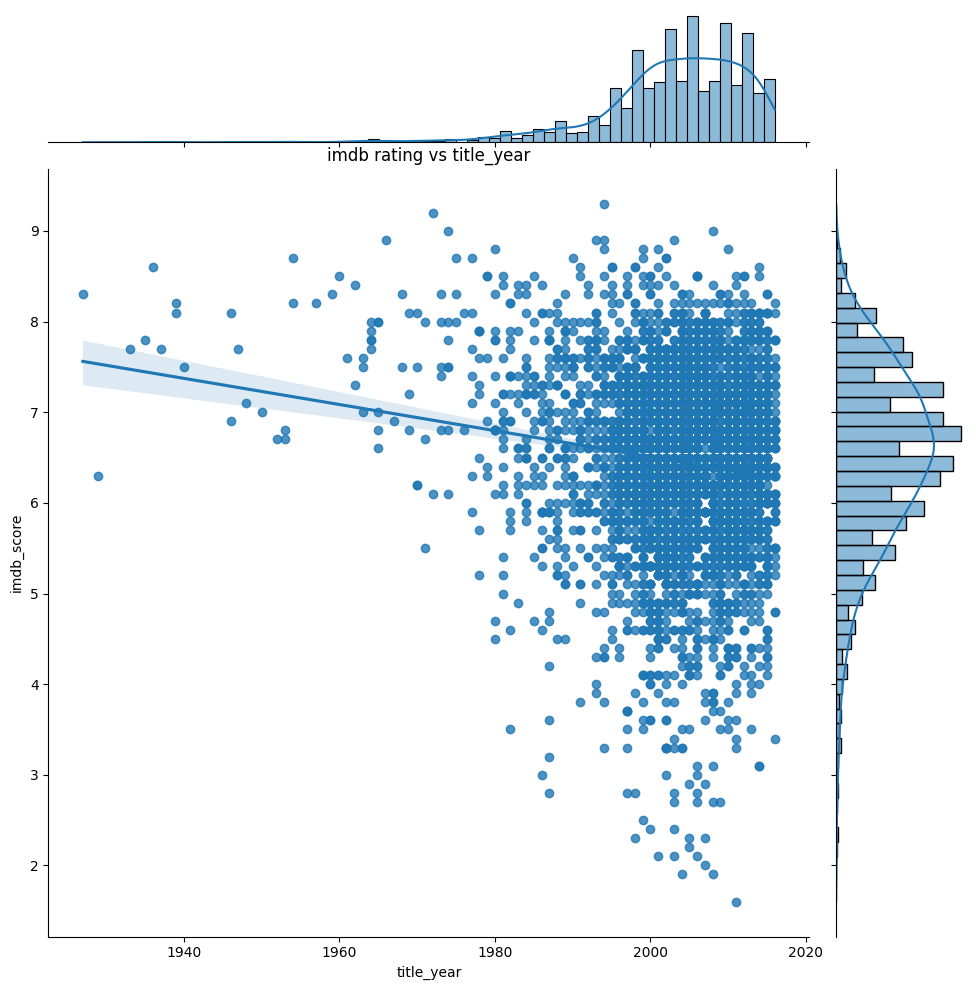

In [39]:
sns.jointplot(x='title_year', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('title_year')
plt.ylabel('imdb_score')
plt.title('imdb rating vs title_year')

#### as per my observation these feature has no or the least impact on the movie rating so droping these column

In [40]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

### Replacing string value with float value

In [41]:
df.columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)

In [42]:
df['country']=le.fit_transform(df['country'].values)

### Spliting feature (x) and value to be predicted(y)

In [43]:
y=df['imdb_score'].values

In [44]:
x=df.loc[:, df.columns != 'imdb_score'].values

In [45]:
df.head

<bound method NDFrame.head of       director_name  num_critic_for_reviews  duration  \
0               620                   723.0     178.0   
1               538                   302.0     169.0   
2              1395                   602.0     148.0   
3               251                   813.0     164.0   
5                62                   462.0     132.0   
...             ...                     ...       ...   
5026           1167                    81.0     110.0   
5027            612                    64.0      90.0   
5033           1425                   143.0      77.0   
5035           1343                    56.0      81.0   
5042            791                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                         0.0                   855.0          1002   
1                       563.0                  1000.0          1592   
2                         0.0                   161.0          1795   
3

## prediction

In [46]:
X_train, X_test, Y_trian, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

#### Random Forest

In [47]:
randregrssor=RandomForestRegressor(n_estimators=50)

In [48]:
randregrssor.fit(X_train,Y_trian)

RandomForestRegressor(n_estimators=50)

In [49]:
predictions = randregrssor.predict(X_test)

In [50]:
errors = abs(predictions - Y_test)

In [51]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.52 degrees.


In [52]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 90.53 %.


(0.0, 10.0)

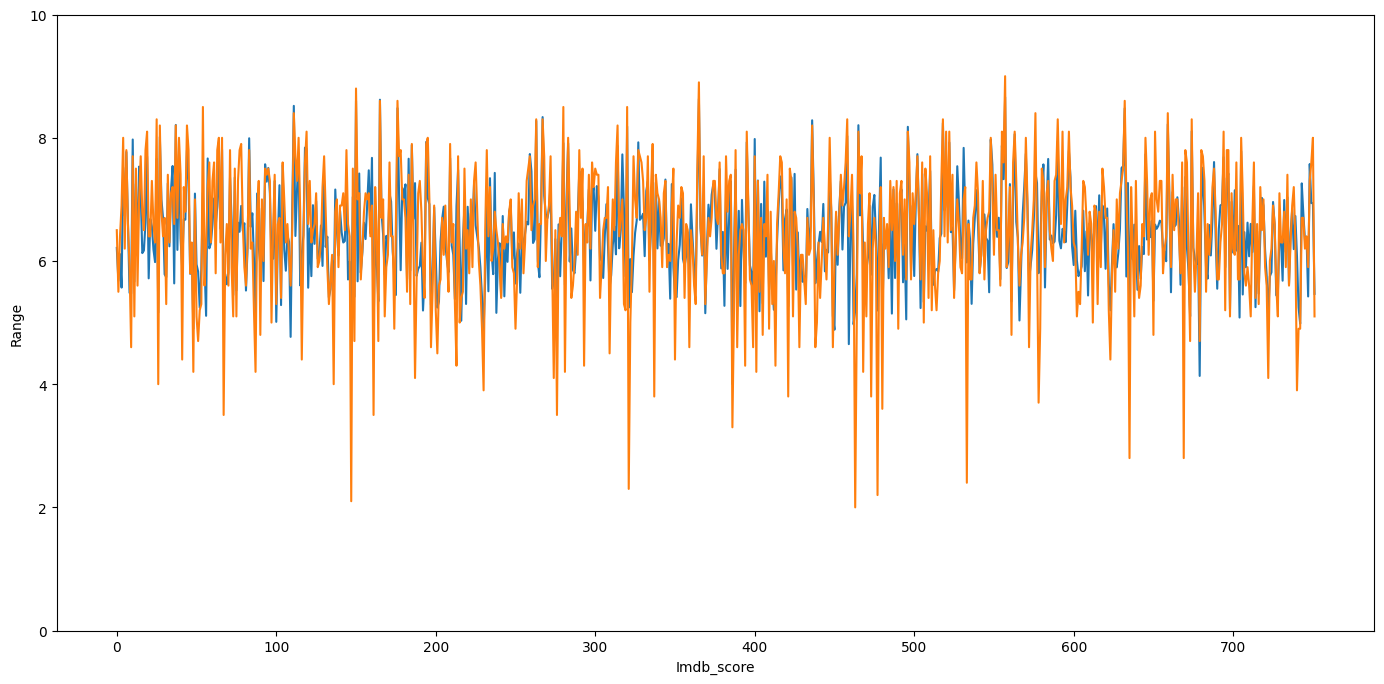

In [53]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### Decision Tree

In [54]:
dr=DecisionTreeRegressor()

In [55]:
dr.fit(X_train,Y_trian)

DecisionTreeRegressor()

In [56]:
predictions = dr.predict(X_test)

In [57]:
errors = abs(predictions - Y_test)

In [58]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.74 degrees.


In [59]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 87.19 %.


(0.0, 10.0)

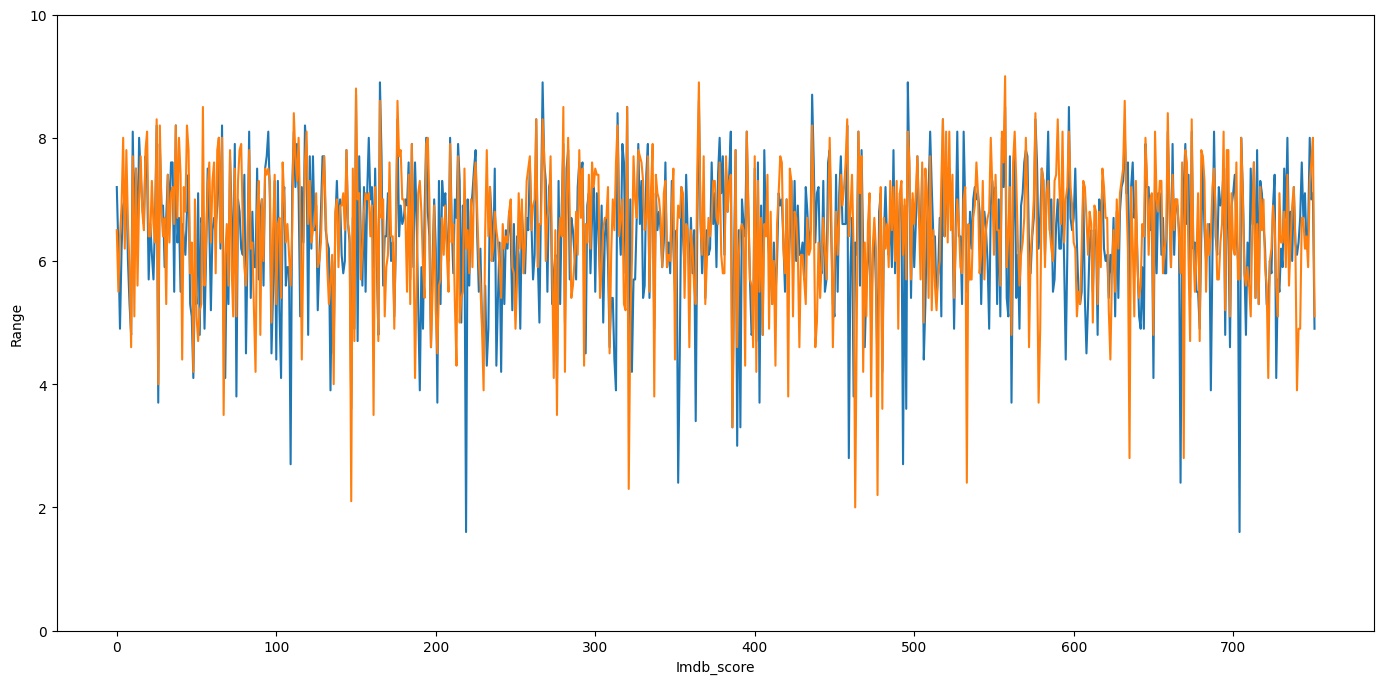

In [60]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### Support Vector Machine

In [61]:
svm=SVR()

In [62]:
svm.fit(X_train,Y_trian)

SVR()

In [63]:
predictions = svm.predict(X_test)

In [64]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.78 degrees.
Accuracy: 85.77 %.


(0.0, 10.0)

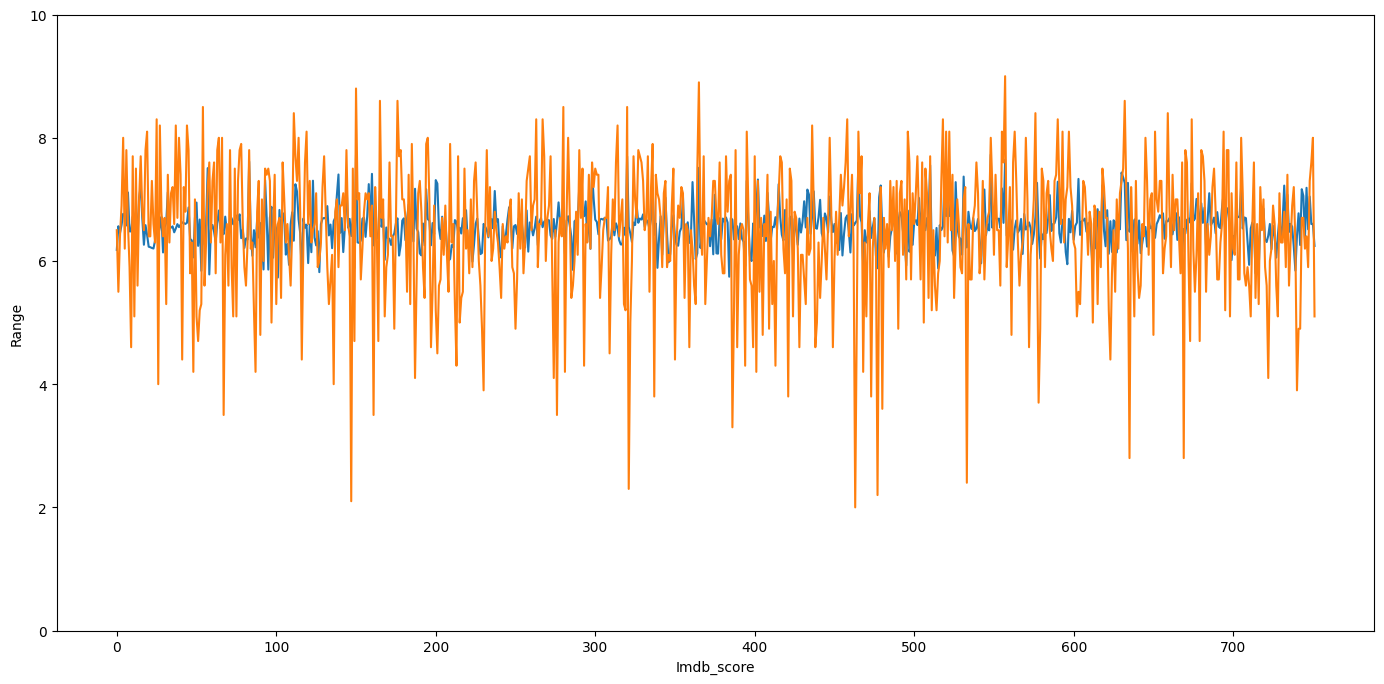

In [65]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### XG Boost

In [66]:
from xgboost import XGBRegressor

In [67]:
xgboost=XGBRegressor(n_estimators=50)

In [68]:
xgboost.fit(X_train,Y_trian)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
predictions=xgboost.predict(X_test)

In [70]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.49 degrees.
Accuracy: 91.12 %.


(0.0, 10.0)

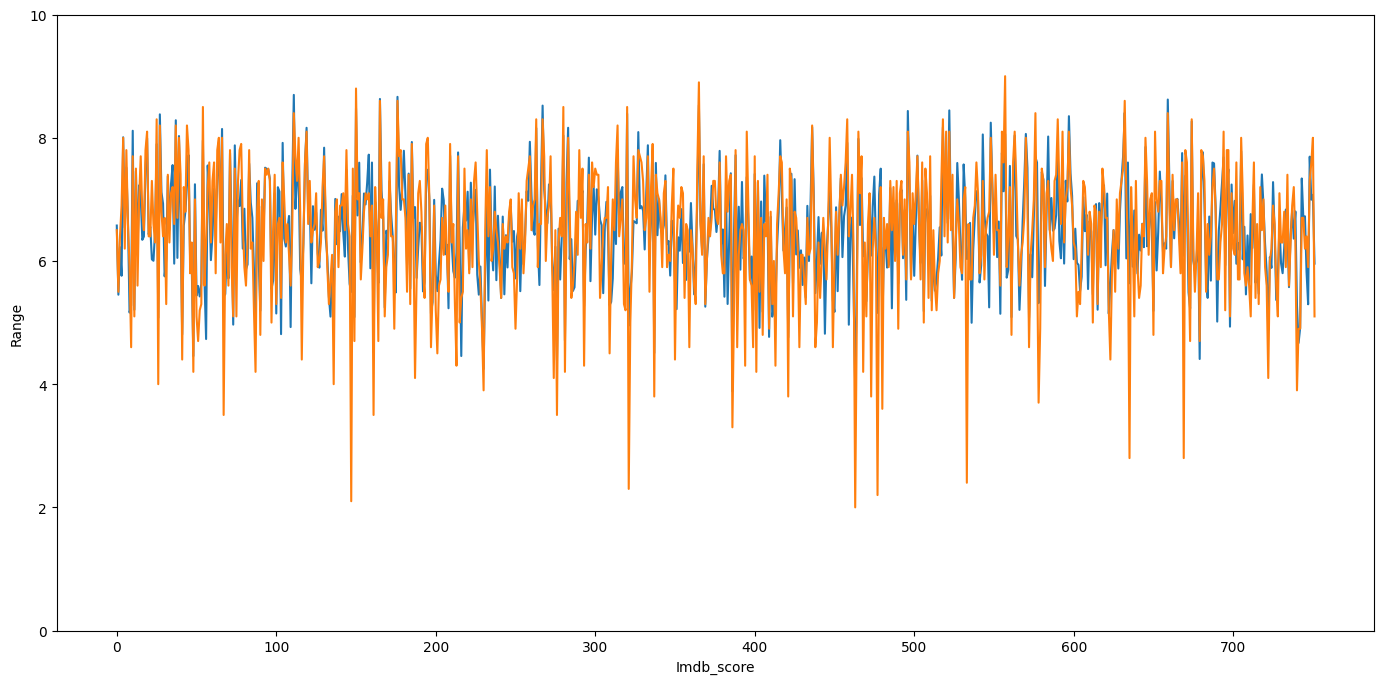

In [71]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

### I would chose random forest model for the production as it has the least mean abs error. XG boost performance is similar to that of random forest but still it didnot achieve same accuracy.

In [72]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 167,425
Trainable params: 167,425
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, Y_trian, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
76/76 [==============================] - 2s 10ms/step - loss: 46013.6484 - mean_absolute_error: 46013.6484 - val_loss: 12755.6143 - val_mean_absolute_error: 12755.6143
Epoch 2/500
76/76 [==============================] - 1s 10ms/step - loss: 5258.1245 - mean_absolute_error: 5258.1245 - val_loss: 13398.9717 - val_mean_absolute_error: 13398.9717
Epoch 3/500
76/76 [==============================] - 1s 10ms/step - loss: 5284.4629 - mean_absolute_error: 5284.4629 - val_loss: 7291.1821 - val_mean_absolute_error: 7291.1821
Epoch 4/500
76/76 [==============================] - 1s 13ms/step - loss: 1372.3384 - mean_absolute_error: 1372.3384 - val_loss: 1566.4147 - val_mean_absolute_error: 1566.4147
Epoch 5/500
76/76 [==============================] - 1s 10ms/step - loss: 1068.0862 - mean_absolute_error: 1068.0862 - val_loss: 502.1750 - val_mean_absolute_error: 502.1750
Epoch 6/500
76/76 [==============================] - 1s 7ms/step - loss: 509.9631 - mean_absolute_error: 509.9631 - 

In [74]:
predictions = model.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [75]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.84 degrees.
Accuracy: 84.68 %.


(0.0, 10.0)

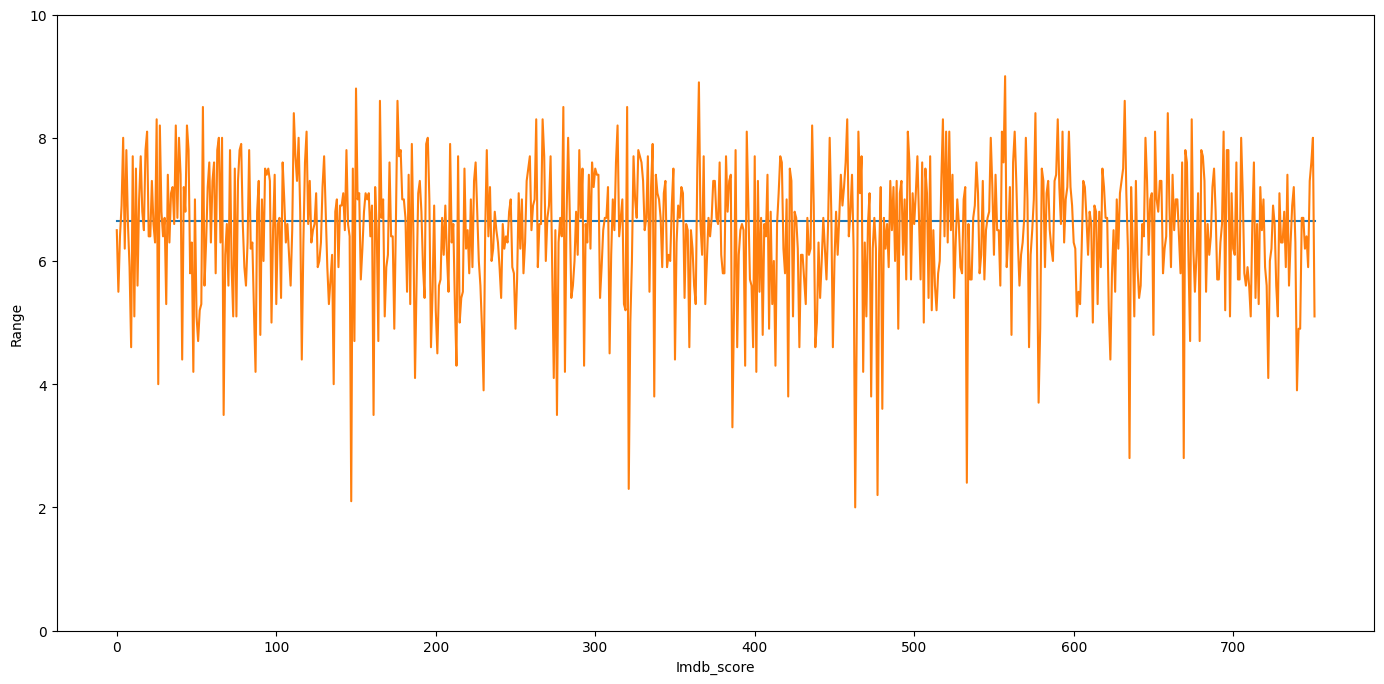

In [76]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)